In [1]:
# 데이터 불러오기
election <- read.csv("../Data/election_2022.csv", stringsAsFactors = F)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [2]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [3]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ 시군구  : chr  "종로구" "중구" "용산구" "성동구" ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [4]:
sum(is.na(election))

[1] 0

In [5]:
table(election$시군구)


          가평군           강남구           강동구           강릉시 
               1                1                1                1 
          강북구           강서구           강진군           강화군 
               1                2                1                1 
          거제시           거창군           경산시           경주시 
               1                1                1                1 
          계룡시           계양구           고령군           고성군 
               1                1                1                2 
    고양시덕양구   고양시일산동구   고양시일산서구           고창군 
               1                1                1                1 
          고흥군           곡성군           공주시           과천시 
               1                1                1                1 
          관악구           광명시           광산구           광양시 
               1                1                1                1 
          광진구           괴산군           구례군           구로구 
               1                1                1                1 
  

In [6]:
library(dplyr)
library(plotrix)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
vote <- aggregate(cbind(선거인수,투표수)~광역시도,election,sum)

In [8]:
vote$투표율 <- round(vote$투표수 / vote$선거인수 * 100,2)
vote <- arrange(vote, desc(투표수))
vote

광역시도,선거인수,투표수,투표율
경기도,11106036,8518854,76.70
서울특별시,8346647,6501831,77.90
부산광역시,2921510,2200224,75.31
경상남도,2809907,2146882,76.40
인천광역시,2519225,1883504,74.77
경상북도,2273028,1774284,78.06
대구광역시,2046714,1611512,78.74
충청남도,1796474,1324660,73.74
전라남도,1581278,1282168,81.08
전라북도,1533125,1235212,80.57


In [9]:
vote.rate <- round(vote$투표수 / sum(vote$투표수) * 100,2)
vote.rate

[1] 25.23 19.26  6.52  6.36  5.58  5.25  4.77  3.92  3.80  3.66  3.01  2.92
[13]  2.85  2.80  2.18  1.21  0.69

In [10]:
label <- paste(vote$광역시도, "\n",vote.rate,"%")
label

[1] "경기도 \n 25.23 %"        "서울특별시 \n 19.26 %"   
 [3] "부산광역시 \n 6.52 %"     "경상남도 \n 6.36 %"      
 [5] "인천광역시 \n 5.58 %"     "경상북도 \n 5.25 %"      
 [7] "대구광역시 \n 4.77 %"     "충청남도 \n 3.92 %"      
 [9] "전라남도 \n 3.8 %"        "전라북도 \n 3.66 %"      
[11] "강원도 \n 3.01 %"         "광주광역시 \n 2.92 %"    
[13] "충청북도 \n 2.85 %"       "대전광역시 \n 2.8 %"     
[15] "울산광역시 \n 2.18 %"     "제주특별자치도 \n 1.21 %"
[17] "세종특별자치시 \n 0.69 %"

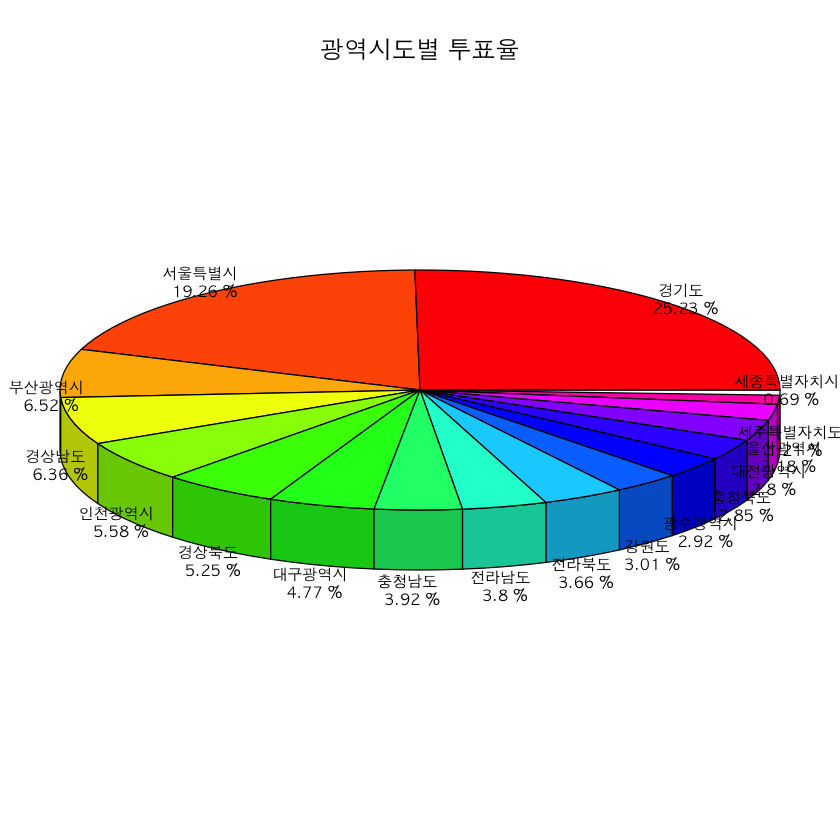

In [11]:
par(family = "AppleGothic")
options(warn = -1)
pie3D(vote.rate,
      main = "광역시도별 투표율",
      labels = label,
      labelcex = 0.75,
      radius = 1.2
      
     )

In [12]:
# electionSum = 이재명 + 윤석열 + 심상정

election$electionSum <- apply(election[,5:7],1,sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [13]:
# electionRatio = 투표수 대비 electionSum의 퍼센트 구해서 넣기
election$electionRatio <- election$electionSum / election$투표수 * 100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [14]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기(+ 정렬, subset 방법도 있음)

election[grep(max(election$electionRatio), election$electionRatio)[1],1:2]
election[grep(min(election$electionRatio), election$electionRatio)[1],1:2]

,광역시도,시군구
82,경기도,성남시분당구


,광역시도,시군구
59,인천광역시,옹진군


In [15]:
# 정렬
arrange(election, desc(electionRatio))[1,]
arrange(election, desc(electionRatio))[nrow(election),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [16]:
# subset
subset(election, electionRatio == max(election$electionRatio))
subset(election, electionRatio == min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [17]:
# election_2022_job1.csv로 저장하기

write.csv(election,file="../Data/election_2022_job1.csv", row.names = F )

---

In [18]:
# 각 후보(윤석열, 이재명, 심상정)의 광역시도별 득표율을 3D Pie Chart로 표현하기
# (단, 득표율이 3% 미만인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다. / 퍼센트 단위는 소수 한자리)

In [19]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [20]:
vote.이재명 <- arrange(aggregate(이재명~광역시도,election,sum), desc(이재명))

In [21]:
label <- round(vote.이재명$이재명 / sum(vote.이재명$이재명) * 100,1)
label <- ifelse(label > 3, paste(vote.이재명$광역시도,"\n",label,"%"),vote.이재명$광역시도)

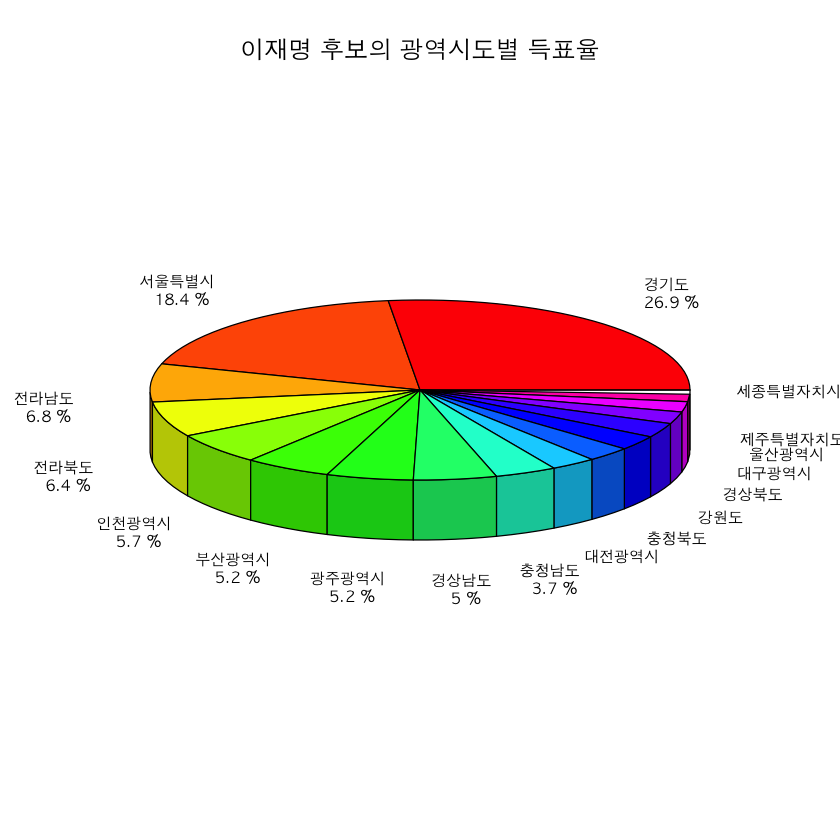

In [22]:
par(family = "AppleGothic")
options(warn = -1)
pie3D(vote.이재명$이재명,
      main = "이재명 후보의 광역시도별 득표율",
      labels = label,
      labelcex = 0.75,
      radius = 0.9
     )

In [23]:
vote

광역시도,선거인수,투표수,투표율
경기도,11106036,8518854,76.70
서울특별시,8346647,6501831,77.90
부산광역시,2921510,2200224,75.31
경상남도,2809907,2146882,76.40
인천광역시,2519225,1883504,74.77
경상북도,2273028,1774284,78.06
대구광역시,2046714,1611512,78.74
충청남도,1796474,1324660,73.74
전라남도,1581278,1282168,81.08
전라북도,1533125,1235212,80.57


In [24]:
# 수도권(경기도, 서울, 인천)의 투표인구수의 퍼센트?
round(sum(vote[c(1,2,5),3]) / sum(vote[,3]) * 100,2)

[1] 50.06

In [25]:
# 윤석열 후보의 서울 득표 Top 5를 구하고 나머지 지역은 기타로 합치기
# election_seul <- election[election$광역시도 == "서울특별시",]
vote.seoul.윤석열 <- arrange(subset(election, 광역시도 == "서울특별시"), desc(윤석열))
vote.seoul.윤석열 <- rbind(vote.seoul.윤석열[1:5,c(2,6)],
                      c("기타", sum(vote.seoul.윤석열[-c(1:5),6])))
vote.seoul.윤석열$윤석열 <- as.numeric(vote.seoul.윤석열$윤석열)

In [26]:
label <- paste(vote.seoul.윤석열[,1], "\n",
               round(vote.seoul.윤석열[,2] / sum(vote.seoul.윤석열[,2]) * 100, 2), "%")
label

[1] "송파구 \n 7.84 %" "강남구 \n 7.25 %" "강서구 \n 5.58 %" "서초구 \n 5.51 %"
[5] "노원구 \n 5.02 %" "기타 \n 68.81 %"

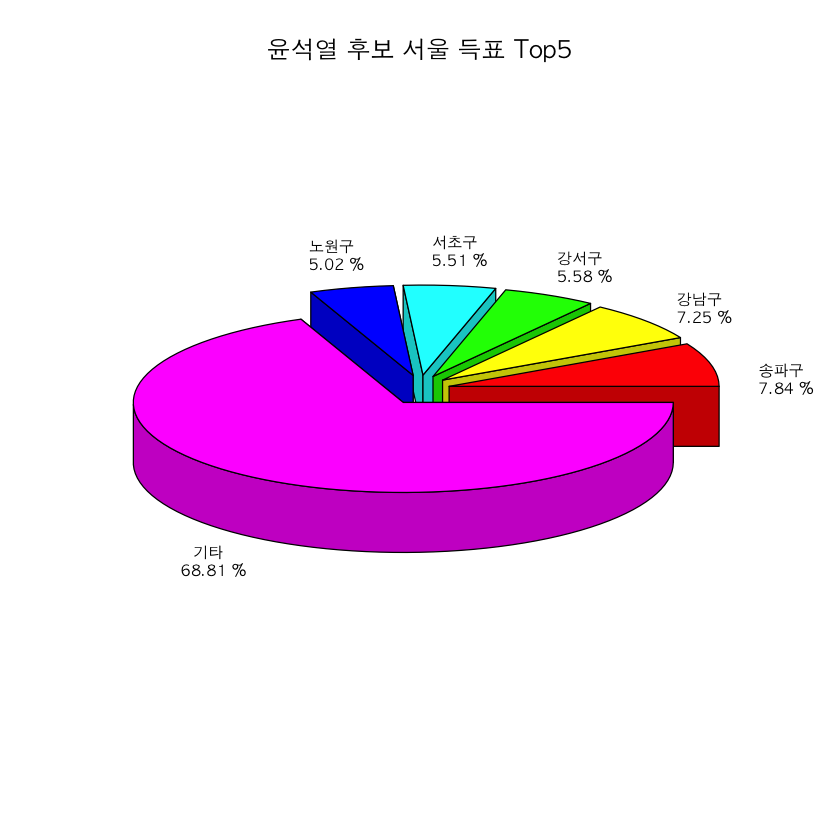

In [27]:
par(family = "AppleGothic")
options(warn = -1)
pie3D(vote.seoul.윤석열$윤석열,
      main = "윤석열 후보 서울 득표 Top5",
      labels = label,
      labelcex = 0.75,
      explode = 0.1,
      radius = 0.9
     )

# 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구

In [28]:
vote.성북구 <- round(election[election$시군구 == "성북구",5:7] / election[election$시군구 == "성북구",4] * 100,2)
vote.성북구$기타 <- as.numeric(100 - sum(vote.성북구[,1:3]))
label <- paste(colnames(vote.성북구), "\n", vote.성북구[,1:4],"%")

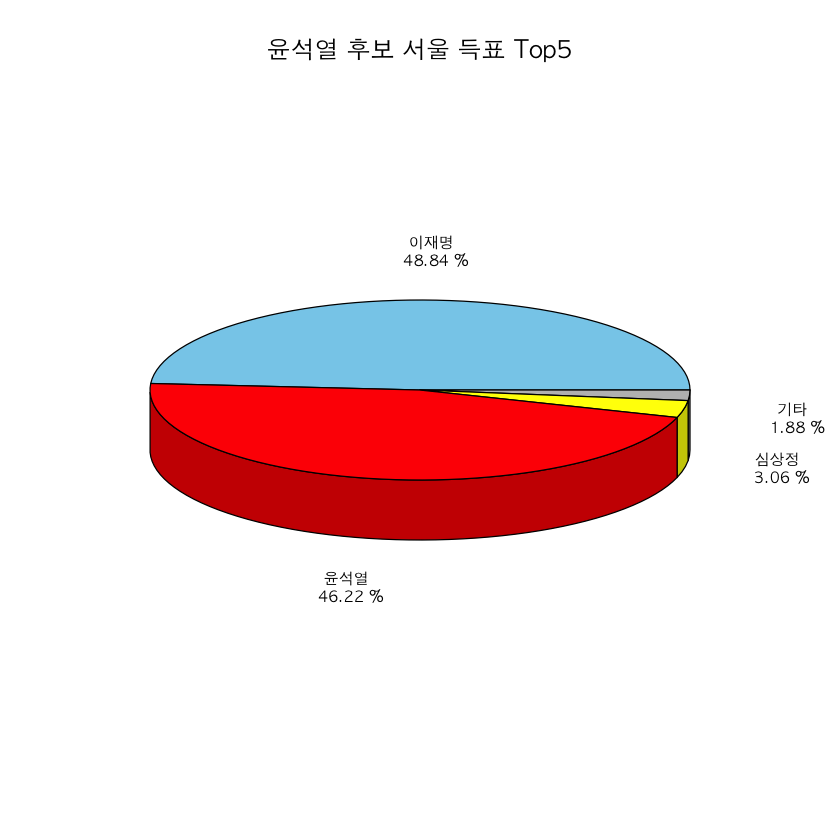

In [29]:
par(family = "AppleGothic")
options(warn = -1)
pie3D(t(vote.성북구),
      main = "윤석열 후보 서울 득표 Top5",
      labels = label,
      labelcex = 0.75,
      radius = 0.9,
      col=c("skyblue","red","yellow","gray")
     )

---
# 투표수가 가장 많은 4 지역(광역시도)의 후보별 득표 차이를 막대 그래프로 시각화

In [30]:
vote.4 <- arrange(aggregate(cbind(투표수,이재명,윤석열,심상정)~광역시도, election, sum),
                  desc(투표수))[1:4,c(1,3:5)]

In [31]:
vote.4.2 <- t(vote.4[2:4])
colnames(vote.4.2) <- unlist(vote.4[1])
class(vote.4.2)

[1] "matrix"

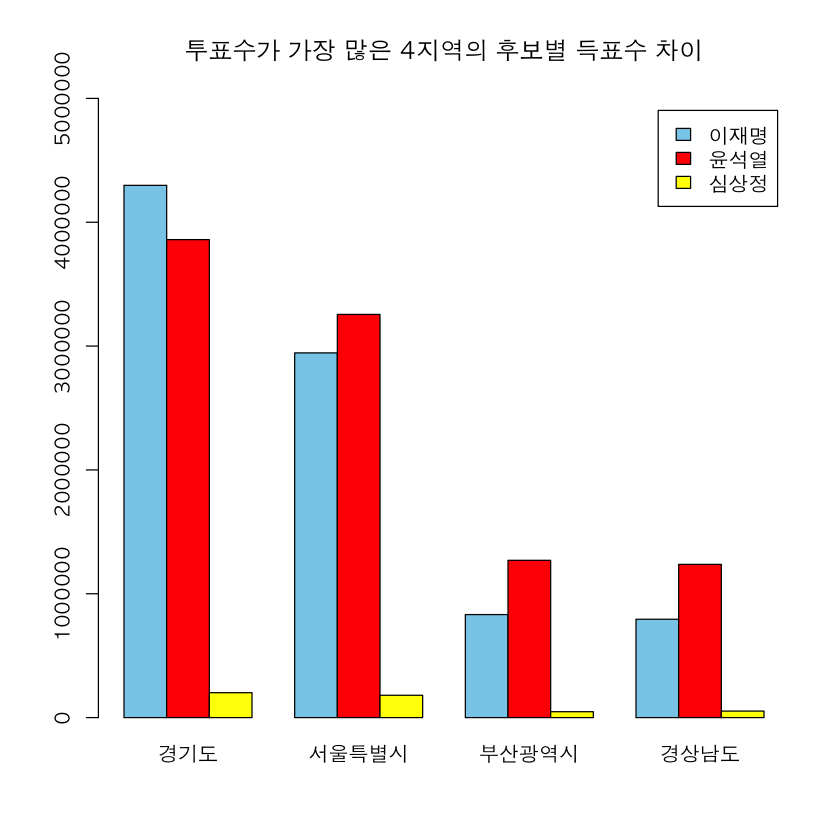

In [32]:
par(family = "AppleGothic")
options(scipen = 100)
barplot(vote.4.2,
        beside = T,
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이",
        ylim = c(0,5000000),
        col = c("skyblue", "red","yellow"),
        legend = T
       )

---
# 투표수가 높은 시군구의 후보별 득표수를 막대그래프로 시각화

In [33]:
vote.5 <- t(arrange(election, desc(투표수))[1:5,5:7])
colnames(vote.5) <- paste(arrange(election, desc(투표수))[1:5,1],arrange(election, desc(투표수))[1:5,2])

In [34]:
vote.5

,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


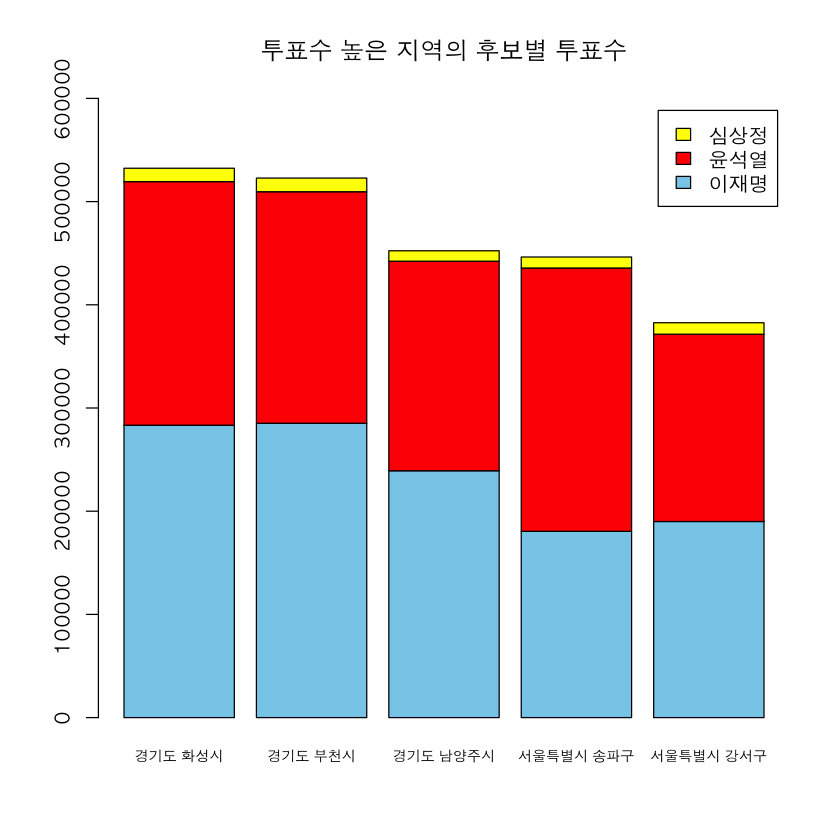

In [35]:
par(family = "AppleGothic")
barplot(vote.5,
        main = "투표수 높은 지역의 후보별 투표수",
        ylim = c(0,600000),
        col = c("skyblue", "red","yellow"),
        legend = T,
        cex.names = 0.7
       )

In [36]:
election

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565
서울특별시,중랑구,347108,260862,130381,118201,6899,255481,97.93722
서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141
서울특별시,강북구,268974,199448,103333,86540,5245,195118,97.82901
서울특별시,도봉구,281812,216036,106546,99780,5605,211931,98.09985


각 시군구별 실제 투표율과 가장 유사한 지역을 뽑아서 각각의 투표율을 막대그래프로 그려라   
(조건1 : 각 후보별 순위 변동 없음,    
 조건 2 : 각 후보별 오차 1프로 이내,    
 조건 3 : 오차의 합이 최소인 지역 순서대로 정렬)    

In [37]:
vote.윤석열 <- 48.56
vote.이재명 <- 47.83
vote.심상정 <- 2.37

In [38]:
vote.윤석열 <- round(sum(election[,5]) / sum(election[,4]) * 100,2)
vote.이재명 <- round(sum(election[,6]) / sum(election[,4]) * 100.2)
vote.심상정 <- round(sum(election[,7]) / sum(election[,4]) * 100,2)

In [39]:
a <- election[,5:7]/ election[,4] * 100
a <- cbind(시군구=election$시군구, a)
a

시군구,이재명,윤석열,심상정
종로구,45.84166,48.86464,3.095529
중구,44.99400,50.47883,2.717711
용산구,39.49746,55.92695,2.876345
성동구,42.79609,52.66680,2.720037
광진구,46.68176,48.30022,3.003342
동대문구,46.60414,48.63726,2.764254
중랑구,49.98083,45.31170,2.644693
성북구,48.83927,46.21835,3.063791
강북구,51.80949,43.38976,2.629758
도봉구,49.31863,46.18675,2.594475


In [40]:
b <- a[((abs(a[,3]-vote.윤석열) < 1) & (abs(a[,2]-vote.이재명) < 1) & (abs(a[,4]-vote.심상정) < 1)),]

In [41]:
b

,시군구,이재명,윤석열,심상정
11,노원구,48.46162,46.76250,2.868905
13,서대문구,47.84852,47.00371,3.271881
16,강서구,48.68711,46.51157,2.844352
17,구로구,48.74212,46.58105,2.762348
50,중구,48.75673,46.38558,2.547573
52,미추홀구,47.08443,47.80874,2.743668
68,유성구,47.05121,48.19437,2.810061
78,수원시팔달구,48.50410,46.85481,2.510303
79,수원시영통구,47.84281,47.77340,2.669828
85,안양시동안구,48.57198,47.33992,2.573063


In [42]:
i <- 1
ifelse(b[,2] > b[,3],1,0)


[1] 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1

In [43]:
c <- b[-(5:6),]
c

,시군구,이재명,윤석열,심상정
11,노원구,48.46162,46.76250,2.868905
13,서대문구,47.84852,47.00371,3.271881
16,강서구,48.68711,46.51157,2.844352
17,구로구,48.74212,46.58105,2.762348
68,유성구,47.05121,48.19437,2.810061
78,수원시팔달구,48.50410,46.85481,2.510303
79,수원시영통구,47.84281,47.77340,2.669828
85,안양시동안구,48.57198,47.33992,2.573063
97,의왕시,48.62473,47.35069,2.402193
104,하남시,48.40897,47.92155,2.213944


In [44]:
c$test <- abs(c[,3] - vote.윤석열) + abs(c[,2] - vote.이재명) + abs(c[,4] - vote.심상정)
c <- arrange(c,test)

In [45]:
c

시군구,이재명,윤석열,심상정,test
의왕시,48.62473,47.35069,2.402193,0.6762301
안양시동안구,48.57198,47.33992,2.573063,0.8051230
수원시영통구,47.84281,47.77340,2.669828,0.8804165
안성시,48.32425,46.68513,2.463793,1.1029136
하남시,48.40897,47.92155,2.213944,1.1165768
수원시팔달구,48.50410,46.85481,2.510303,1.1595961
아산시,48.34056,46.64873,2.579214,1.2710455
청주시청원구,48.09990,46.55199,2.826810,1.3747242
서대문구,47.84852,47.00371,3.271881,1.4196522
노원구,48.46162,46.76250,2.868905,1.5680324


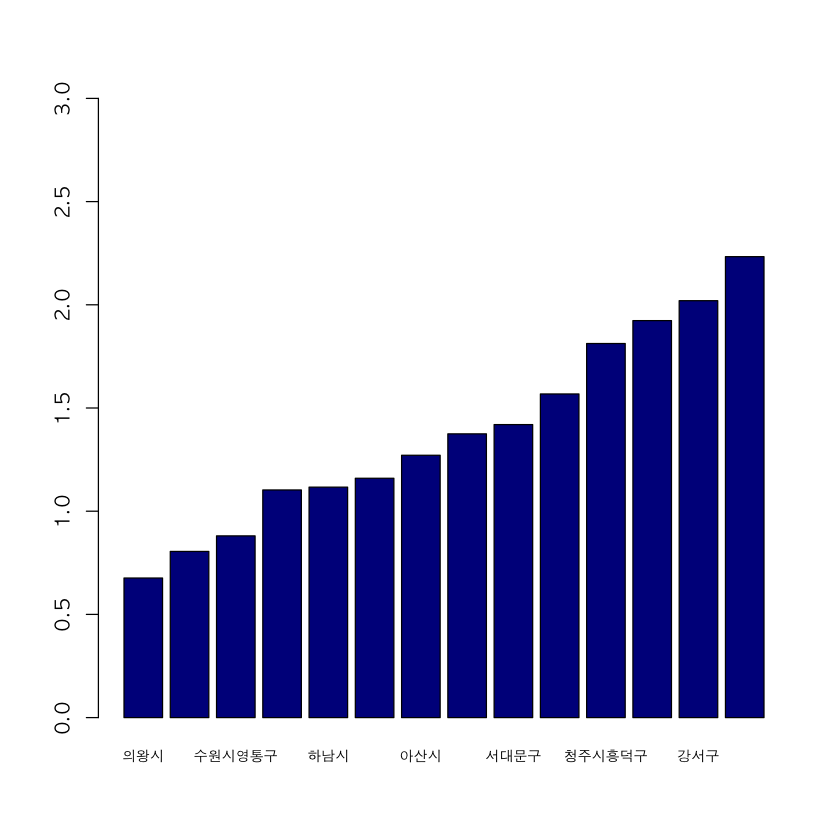

In [46]:
par(family = "AppleGothic")
barplot(c$test,
        main = "",
        ylim = c(0,3),
        col = "darkblue",
        names = c$시군구,
        cex.names = 0.7
       )